# Suicide Rates Worldwide -  Analysis (1985 - 2016)

The dataset provided to us contains the rates of suicide across countries around the world, across a specific time frame. Our job is to analyse the dataset and present our observations. 

Before we begin analysing, we first need to take a look at the dataset to see what we are working with. 


### Import Libraries and Dataset

In [1]:
#import essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import os
np.random.seed(0)
print("Libraries Imported, Setup Complete")

Libraries Imported, Setup Complete


In [2]:
# import dataset

data = pd.read_csv("../input/suicide-rates-overview-1985-to-2016/master.csv")

# view the top and bottom of the dataset

data.head(5)
data.tail(5)

# view a sample of the dataset 

data.sample(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
5820,Colombia,2000,male,35-54 years,453,4391802,10.31,Colombia2000,0.654,"99,886,577,331",2755,Boomers
23242,Slovenia,2012,male,35-54 years,134,313295,42.77,Slovenia2012,0.878,"46,352,802,766",23820,Generation X
25643,Turkey,2009,female,55-74 years,38,4301203,0.88,Turkey2009,NaN,"644,639,902,581",9773,Silent
24011,Sri Lanka,2003,male,25-34 years,650,1488285,43.67,Sri Lanka2003,NaN,"18,881,765,437",1077,Generation X
21706,Saint Vincent and Grenadines,1997,male,15-24 years,1,11269,8.87,Saint Vincent and Grenadines1997,NaN,"347,770,000",3613,Generation X
18749,Paraguay,2003,male,25-34 years,16,400125,4.00,Paraguay2003,NaN,"6,588,103,836",1339,Generation X
14304,Kuwait,2000,female,15-24 years,2,147681,1.35,Kuwait2000,0.804,"37,711,864,407",19112,Generation X
20581,Republic of Korea,2014,female,75+ years,721,1627234,44.31,Republic of Korea2014,NaN,"1,411,333,926,201",29120,Silent
8003,Ecuador,2010,female,35-54 years,39,1675740,2.33,Ecuador2010,0.717,"69,555,367,000",5206,Generation X
24619,Sweden,2007,female,5-14 years,2,500349,0.40,Sweden2007,NaN,"487,816,328,342",56531,Generation Z


Now that we have imported and saved our dataset, we are ready to begin working on it. Before we go about analysing the dataset, we would have to tweak it to meet our demands.


### Exploring and Tweaking the Dataset

In [3]:
# view the column names in the dataset

data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [4]:
# change column names as per your suiting

data = data.rename(columns={'country':'Country', 'year':'Year', 'sex':'Gender', 'age':'Age', 'suicides_no':'SuicideNumber', 'population':'Population', 'suicides/100k pop':'SuicidePer100K', 'country-year':'CountryYearCode', 'HDI for year':'HDI',' gdp_for_year ($) ':'GDP', 'gdp_per_capita ($)':'GDPCapita', 'generation':'Generation'})
data.head(5)

,Country,Year,Gender,Age,SuicideNumber,Population,SuicidePer100K,CountryYearCode,HDI,GDP,GDPCapita,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


We see a lot of NaN values in HDI. These signify null values. 
These can either be changed to 0 or removed entirely, depending upon its frequency.

In [5]:
# check for any empty values

data.isnull().any()

Country            False
Year               False
Gender             False
Age                False
SuicideNumber      False
Population         False
SuicidePer100K     False
CountryYearCode    False
HDI                 True
GDP                False
GDPCapita          False
Generation         False
dtype: bool

In [6]:
# find the number of empty values in the dataset

data.isnull().sum()

Country                0
Year                   0
Gender                 0
Age                    0
SuicideNumber          0
Population             0
SuicidePer100K         0
CountryYearCode        0
HDI                19456
GDP                    0
GDPCapita              0
Generation             0
dtype: int64

Since HDI has a majority of empty values, we can afford to drop the column entirely as it will not be able to provide much data to our analysis. 

In [7]:
# drop column in dataset

data = data.drop(['HDI', 'CountryYearCode'], axis=1)

We also dropped the CountryYearCode column as it does not provide any useful information to our analysis.

Now that we have dropped the HDI column, we realise that a lot of numerical values in the dataset are represented in the form of strings. This might hinder our calculation process. To avoid that, we will convert all the string numerals per column into integer or float values

In [8]:
# converting all string numerals to int values

data['GDP'].replace(',','', regex=True, inplace=True)
data["GDP"] = data["GDP"].astype('int64')
data["SuicideNumber"] = data["SuicideNumber"].astype(int)
data["Population"] = data["Population"].astype(int)
data["GDPCapita"] = data["GDPCapita"].astype(int)
data["SuicidePer100K"] = data["SuicidePer100K"].astype(float)
data["SuicideNumber"] = data["SuicideNumber"].astype(int)

data

,Country,Year,Gender,Age,SuicideNumber,Population,SuicidePer100K,GDP,GDPCapita,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,63067077179,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,63067077179,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,63067077179,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,63067077179,2309,Generation Z


We have 3 main distributions over which we can compare data against - 
###### Country (and by essence, its Population), Gender and Age (or Generation)

GDP, GDP per Capita and Suicide Per 100K will help us in formulating data across the 3 distributions. 


Suicide Number is what we will ultimately use as our main data. 

## Analysing and Formulating Data

### Analysing by Year

In [9]:
# checking for unique values within the Year column

year = data['Year'].unique()
year

array([1987, 1988, 1989, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       1985, 1986, 1990, 1991, 2012, 2013, 2014, 2015, 2011, 2016])

#### Analysing the role of population in the number of suicides

In [10]:
# gathering data from SuicideNumber and Population based on individual years 

SuicideVal = []
Population = []
suicide_percentage = []
for i in year:
    SuicideVal.append(sum(data[data['Year'] == i]['SuicideNumber']))
    Population.append(sum(data[data['Year'] == i]['Population']))
billion = 1000000000
Population[:] = [x / billion for x in Population]
Population[:] = [round(x, 3) for x in Population]
print(SuicideVal)
print(Population)

[126842, 121026, 160244, 211473, 221565, 232063, 243544, 246725, 240745, 249591, 256119, 255832, 250652, 256095, 256079, 240861, 234375, 233361, 233408, 235447, 243487, 238702, 116063, 120670, 193361, 198020, 230160, 223199, 222984, 203640, 236484, 15603]
[1.095, 1.054, 1.226, 1.57, 1.53, 1.549, 1.592, 1.662, 1.703, 1.725, 1.776, 1.799, 1.756, 1.822, 1.838, 1.745, 1.735, 1.841, 1.86, 1.861, 1.976, 1.997, 1.009, 1.03, 1.467, 1.49, 1.913, 1.89, 1.912, 1.775, 1.993, 0.132]


In [11]:
# forming a dataset from the gathered data

year = data.Year.unique()
pop_suicide_data = {'Year': year, 'Suicides': SuicideVal, 'Population in Billions': Population}
pop_suicide = pd.DataFrame(data=pop_suicide_data)
pop_suicide = pop_suicide.drop(index=31)
pop_suicide = pop_suicide.set_index('Year')
pop_suicide

,Suicides,Population in Billions
Year,,
1987,126842,1.095
1988,121026,1.054
1989,160244,1.226
1992,211473,1.570
1993,221565,1.530
1994,232063,1.549
1995,243544,1.592
1996,246725,1.662
1997,240745,1.703


Now that we have the data, we can begin plotting. For this, we would be using 3 Python libraries - 
###### Matplotlib, Seaborn and Plotly

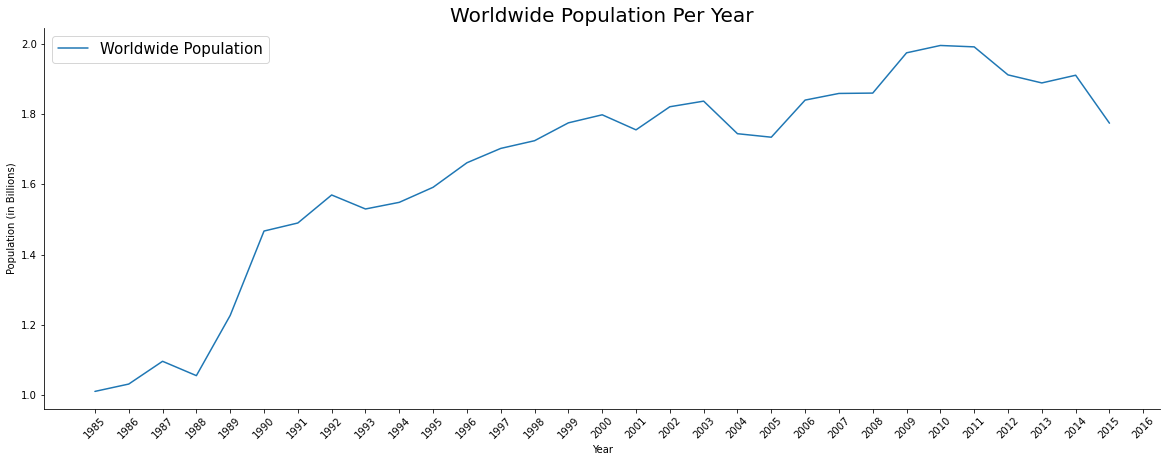

In [12]:
# plotting a line graph depicting the worldwide population per year

fig, ax = plt.subplots(figsize=(20,7))
sns.despine()
sns.set_style("white")

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=15

sns_popyr = sns.lineplot(x='Year', y='Population in Billions', data=pop_suicide.reset_index(), label="Worldwide Population", markers=True, ax=ax)
ax.set_title("Worldwide Population Per Year", fontsize=20)
ax.set_ylabel("Population (in Billions)")
ax.set_xlabel("Year")
ax.set_xticks(year)
ax.set_xticklabels(year, rotation=45)
sns_popyr.figure.savefig("Worldwide Population Per Year.png")
plt.show()

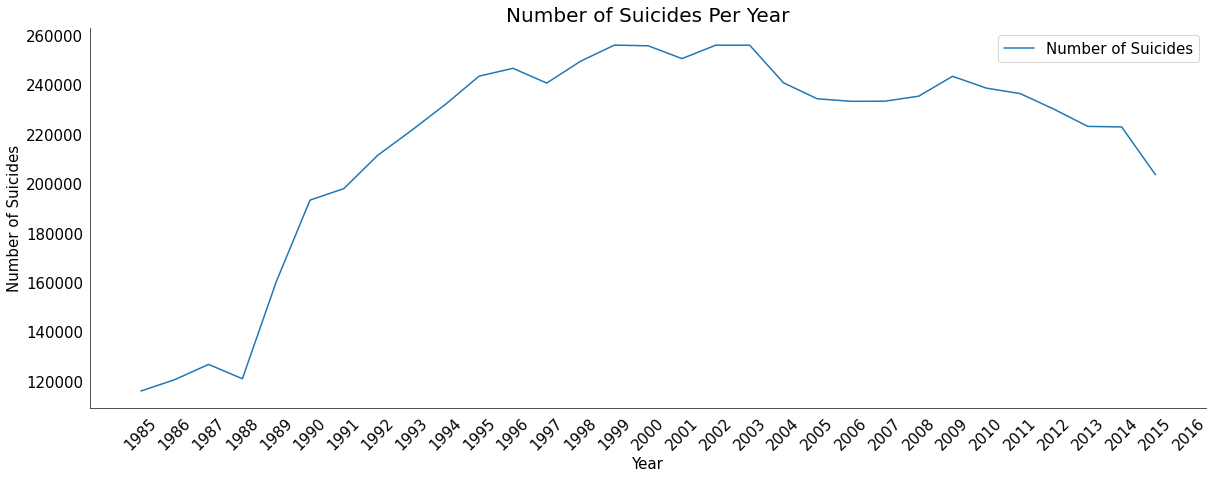

In [13]:
# plotting a line graph depicting the number of suicides per year

fig, ax = plt.subplots(figsize=(20,7))
sns.despine()
sns.set_style("white")

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=15

sns_suiyr = sns.lineplot(x='Year', y='Suicides', data=pop_suicide.reset_index(), label="Number of Suicides", markers=True, ax=ax)
ax.set_title("Number of Suicides Per Year", fontsize=20)
ax.set_ylabel("Number of Suicides")
ax.set_xlabel("Year")
ax.set_xticks(year)
ax.set_xticklabels(year, rotation=45)
sns_suiyr.figure.savefig("Number of Suicides Per Year.png")
plt.show()

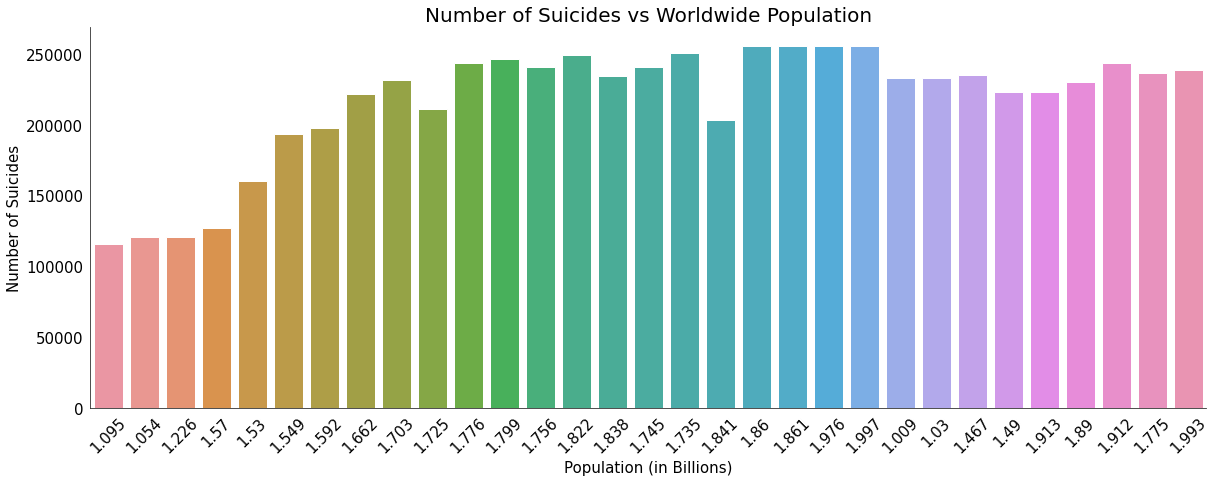

In [14]:
# plotting a bar plot comparing the number of suicides to the worldwide population

fig, ax = plt.subplots(figsize=(20,7))
sns.despine()
sns.set_style("white")

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=15

sns.set_style("white")
sns_suipop = sns.barplot(x='Population in Billions', y='Suicides', data=pop_suicide.reset_index(), label="Number of Suicides vs Worldwide Population", ax=ax)
ax.set_title("Number of Suicides vs Worldwide Population", fontsize=20)
ax.set_ylabel("Number of Suicides")
ax.set_xlabel("Population (in Billions)")
ax.set_xticklabels(Population, rotation=45)
sns_suipop.figure.savefig("Number of Suicides vs Worldwide Population.png")
plt.show()

Now that we have analysed by year, it is time to analyse using countries in question. 

### Analysis by Country

In [15]:
# checking for unique values within the Country column

country = data.Country.unique()
len(country)

101

In [16]:
# gather all the necessary data from the dataset based on individual countries

GDPperCap = []
SuicideNo = []
Suicidesper100K = []
SuicideAvg = []
for i in country:
    GDPperCap.append(sum(data[data.Country == i]['GDPCapita']))
    Suicidesper100K.append(sum(data[data.Country == i]['SuicidePer100K']))
    SuicideNo.append(sum(data[data.Country == i]['SuicideNumber']))
    SuicideAvg.append(sum(data[data.Country == i]['SuicideNumber']))
GDPperCap[:] = [x/180 for x in GDPperCap]
GDPperCap[:] = [round(x, 3) for x in GDPperCap]
Suicidesper100K[:] = [x/12 for x in Suicidesper100K]
Suicidesper100K[:] = [round(x, 3) for x in Suicidesper100K]
SuicideNo[:] = [x for x in SuicideNo]
SuicideNo[:] = [int(x) for x in SuicideNo]
SuicideAvg[:] = [x/30 for x in SuicideAvg]
SuicideAvg[:] = [round(x, 2) for x in SuicideAvg]
print(GDPperCap)
print(Suicidesper100K)
print(SuicideNo)
print(SuicideAvg)

[2726.6, 18806.733, 16355.8, 3102.378, 22606.867, 65552.8, 72711.111, 1072.133, 39615.8, 25255.333, 20418.333, 4667.467, 66271.267, 7478.733, 677.0, 12589.067, 7280.867, 274.933, 59715.8, 15485.667, 7665.2, 10299.4, 15073.544, 6961.867, 27360.8, 22127.744, 72306.533, 99.0, 6791.6, 4081.067, 15926.533, 2869.733, 68572.0, 62962.933, 2776.6, 60951.333, 35173.4, 10693.978, 4527.067, 2791.533, 16137.311, 83349.756, 68461.733, 47792.6, 54978.667, 3741.4, 75221.6, 9237.133, 642.333, 46365.0, 1249.267, 12545.533, 13508.356, 142183.333, 1205.4, 3392.6, 29025.133, 11686.356, 14752.8, 230.278, 2797.067, 75794.467, 43073.667, 811.533, 114639.2, 4148.133, 11044.2, 4258.4, 1540.2, 13034.333, 25517.333, 37928.8, 67003.6, 30589.267, 8890.8, 11733.867, 1105.0, 10806.2, 8257.733, 10732.733, 5365.533, 12786.867, 78637.2, 15438.133, 26099.133, 7452.667, 43363.133, 663.133, 8123.667, 82255.622, 88174.467, 6628.344, 15892.267, 5662.667, 5061.667, 3486.067, 16864.8, 65943.933, 81157.2, 14227.867, 1431.733]
[

In [17]:
# create a dataset based on the data collected

country_suicide_data = {'Country': country, 'GDPperCapita': GDPperCap, 'SuicideNumber': SuicideNo, 'SuicideAverage': SuicideAvg, 'Suicideper100K': Suicidesper100K}
country_suicide = pd.DataFrame(data=country_suicide_data)
country_suicide = country_suicide.drop(index=27)
country_suicide = country_suicide.drop(index=59)
country_suicide = country_suicide.drop(index=76)
country_suicide = country_suicide.sort_values(by=['SuicideNumber'], ascending=False)
country_suicide

,Country,GDPperCapita,SuicideNumber,SuicideAverage,Suicideper100K
75,Russian Federation,11733.867,1209742,40324.73,942.094
98,United States,81157.200,1034013,34467.10,428.414
46,Japan,75221.600,806902,26896.73,668.769
33,France,62962.933,329127,10970.90,650.271
95,Ukraine,3486.067,319950,10665.00,744.305
...,...,...,...,...,...
65,Oman,4148.133,33,1.10,2.208
54,Macau,1205.400,27,0.90,14.312
55,Maldives,3392.600,20,0.67,13.673
1,Antigua and Barbuda,18806.733,11,0.37,14.928


##### All data in the following graphs is arranged based on the number of suicides per country, in descending order

#### Analysing the role of GDP per Capita in the number of suicides

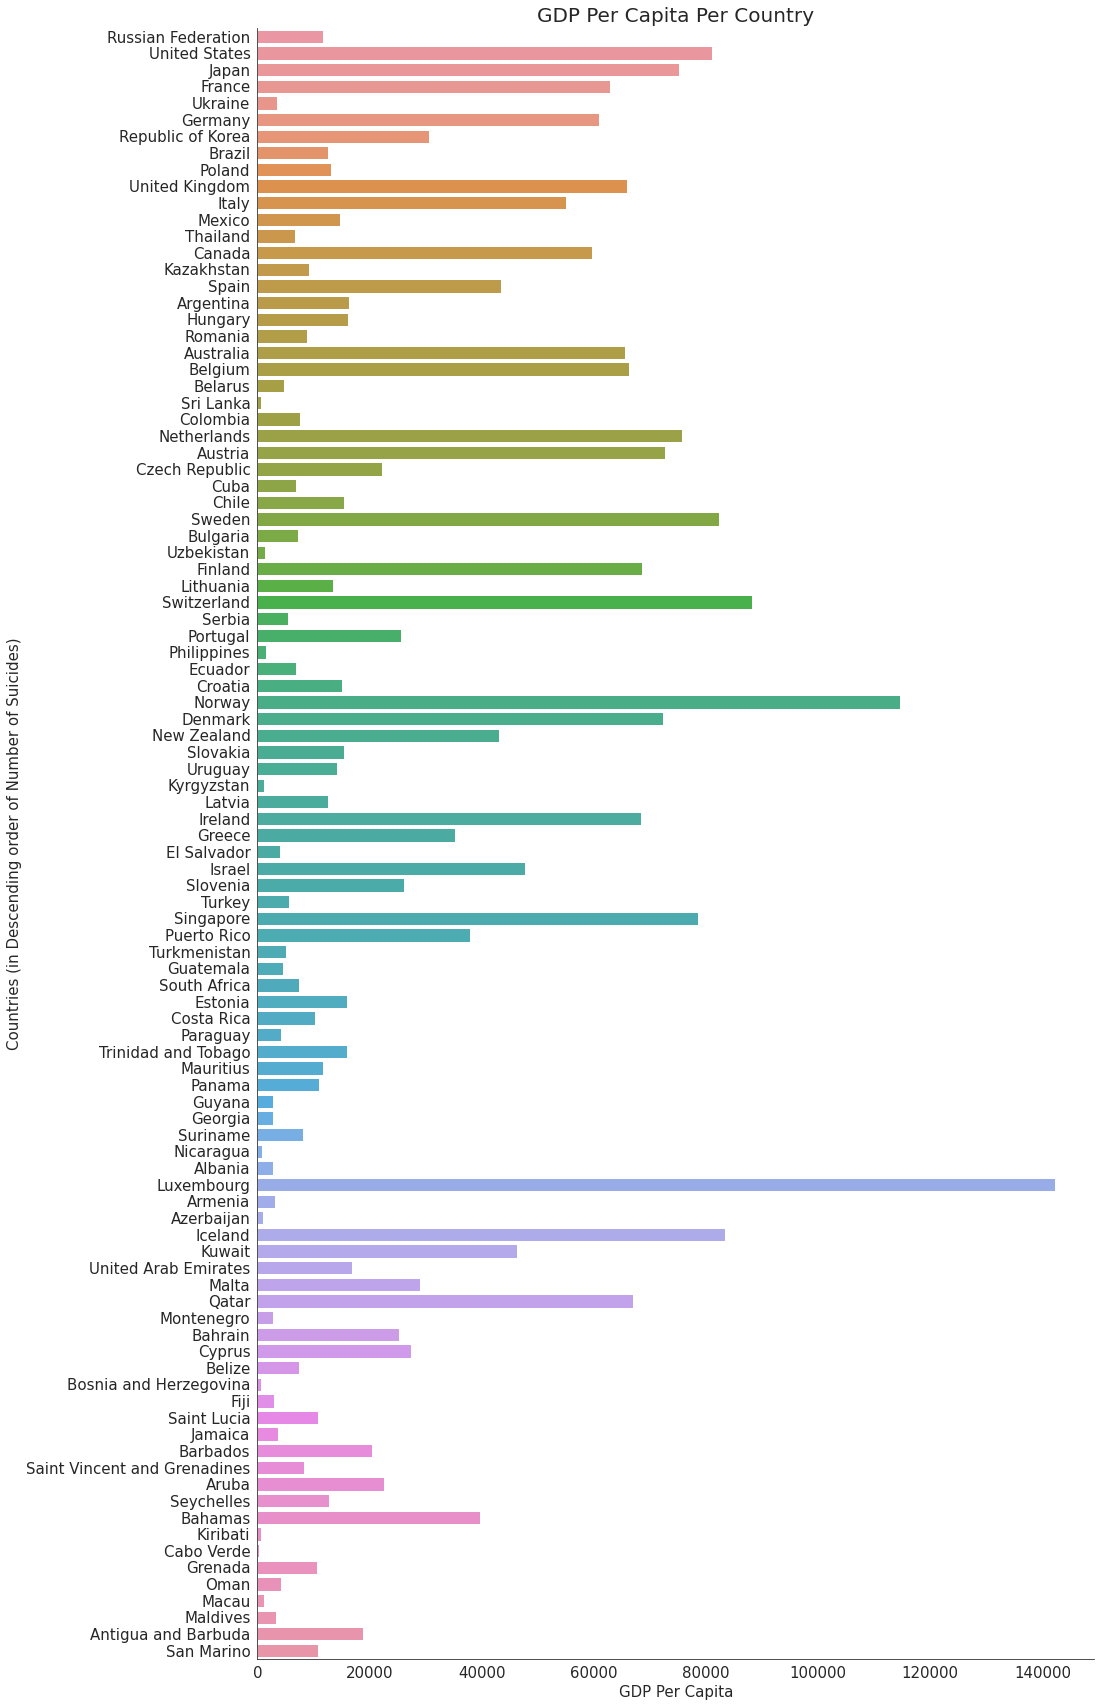

In [18]:
# creating a bar graph comparing the GDP per Capita of each country

fig, ax = plt.subplots(figsize=(15,30))
sns.despine()
sns.set_style("white")

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=15

sns_gdpcapcon = sns.barplot(x='GDPperCapita', y='Country', data=country_suicide.reset_index(), label="GDP Per Capita Per Country", ax=ax)
ax.set_title("GDP Per Capita Per Country", fontsize=20)
ax.set_ylabel("Countries (in Descending order of Number of Suicides)")
ax.set_xlabel("GDP Per Capita")
sns_gdpcapcon.figure.savefig("GDP Per Capita Per Country.png")
plt.show()

#### Analysing the number of suicides per 100K population

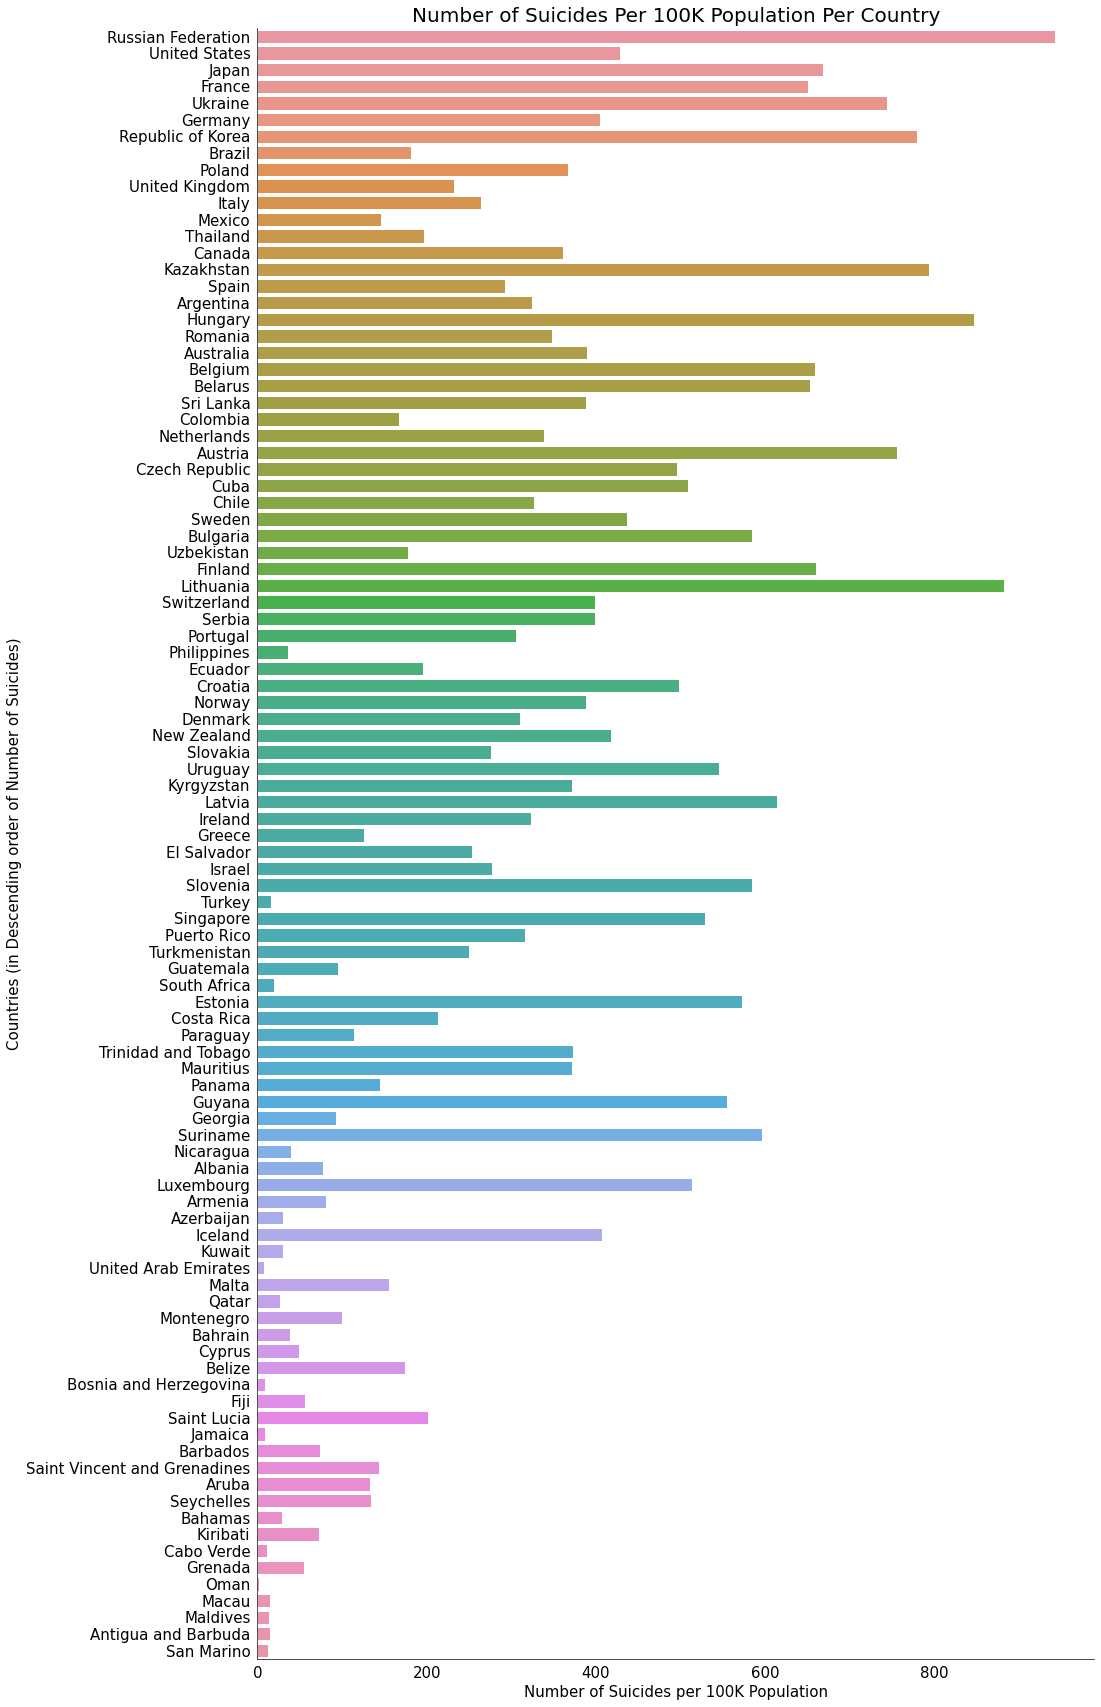

In [19]:
# creating a bar graph to plot the number of suicides per 100K population per country

fig, ax = plt.subplots(figsize=(15,30))
sns.despine()
sns.set_style("white")

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=15

sns_suipopcon = sns.barplot(x='Suicideper100K', y='Country', data=country_suicide.reset_index(), label="Number of Suicides Per 100K Population Per Country", ax=ax)
ax.set_title("Number of Suicides Per 100K Population Per Country", fontsize=20)
ax.set_ylabel("Countries (in Descending order of Number of Suicides)")
ax.set_xlabel("Number of Suicides per 100K Population")
sns_suipopcon.figure.savefig("Number of Suicides Per 100K Population Per Country.png")
plt.show()

Now that we have analysed by country, it is time to analyse using social values, aka Gender and Generation. 

### Analysing by Gender, Generation and Age Demographic

##### Analysing using Gender

In [20]:
# calculating the total number of male and female suicides

suicide_male = 0
suicide_female = 0
for i in year:
    suicide_male = suicide_male + sum(data[(data.Year == i) & (data.Gender == 'male')]['SuicideNumber'])
    suicide_female = suicide_female + sum(data[(data.Year == i) & (data.Gender == 'female')]['SuicideNumber'])
print(suicide_male)
print(suicide_female)

5188910
1559510


In [21]:
# plotting a pie chart depicting the ratio of male to female suicides

labels = ['Male Suicides','Female Suicides']
values = [suicide_male, suicide_female]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.1, 0.1])])
fig.update_layout(title_text="Ratio of Male Suicides to Female Suicides")
fig.show()

##### Analysing using Generation

In [22]:
# calculating the total number of suicides by generation

generation = data.Generation.unique()
gen = []
male_gen = []
female_gen = []
for i in generation:
    gen.append(sum(data[(data.Generation == i)]['SuicideNumber']))
    male_gen.append(sum(data[(data.Generation == i) & (data.Gender == 'male')]['SuicideNumber']))
    female_gen.append(sum(data[(data.Generation == i) & (data.Gender == 'female')]['SuicideNumber']))
print(gen)
print(male_gen)
print(female_gen)

[1532804, 1781744, 510009, 2284498, 623459, 15906]
[1222965, 1309455, 333356, 1823530, 489839, 9765]
[309839, 472289, 176653, 460968, 133620, 6141]


In [23]:
# plotting a pie chart depicting the ratio of suicides among different generations

labels = generation
values = gen

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.1, 0.1, 0.1, 0.1, 0.1, 0.2])])
fig.update_layout(title_text="Division of Suicides by Generation")
fig.show()

In [24]:
# plot a pie chart depicting the number of male suicides across various generations

labels = generation
values = male_gen

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.1, 0.1, 0.1, 0.1, 0.1, 0.2])])
fig.update_layout(title_text="Division of Suicides by Generation - Male")
fig.show()

In [25]:
# plot a pie chart depicting the number of male suicides across various generations

labels = generation
values = female_gen

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.1, 0.1, 0.1, 0.1, 0.1, 0.2])])
fig.update_layout(title_text="Division of Suicides by Generation - Female")
fig.show()

##### Analysing using Age Demographic

In [26]:
# calculating total number of suicides by age demographic

age = data.Age.unique()
agedem = []
male_age = []
female_age = []
for i in age:
    agedem.append(sum(data[(data.Age == i)]['SuicideNumber']))
    male_age.append(sum(data[(data.Age == i) & (data.Gender == 'male')]['SuicideNumber']))
    female_age.append(sum(data[(data.Age == i) & (data.Gender == 'female')]['SuicideNumber']))
print(agedem)
print(male_age)
print(female_age)

[808542, 2452141, 653118, 1123912, 1658443, 52264]
[633105, 1945908, 431134, 915089, 1228407, 35267]
[175437, 506233, 221984, 208823, 430036, 16997]


In [27]:
# plotting a pie chart depicting the ratio of suicides among different age demographics

labels = age
values = agedem

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.1, 0.1, 0.1, 0.1, 0.1, 0.2])])
fig.update_layout(title_text="Division of Suicides by Age Demographic")
fig.show()

In [28]:
# plotting a pie chart depicting the ratio of male suicides among different age demographics

labels = age
values = male_age

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.1, 0.1, 0.1, 0.1, 0.1, 0.2])])
fig.update_layout(title_text="Division of Suicides by Age Demographic - Male")
fig.show()

In [29]:
# plotting a pie chart depicting the ratio of female suicides among different age demographics

labels = age
values = female_age

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.1, 0.1, 0.1, 0.1, 0.1, 0.2])])
fig.update_layout(title_text="Division of Suicides by Age Demographic - Female")
fig.show()

## Final Analyses 

#### Analysis of Gender, Age Demographic and Generation by Year

In [30]:
# segregating data based on year

yrMsuicide = []
yrFsuicide = []
yr_genx = []
yr_sil = []
yr_gigen = []
yr_boom = []
yr_mil = []
yr_genz = []
yr_5to14 = []
yr_15to24 = []
yr_25to34 = []
yr_35to54 = []
yr_55to74 = []
yr_75plus = []
for i in year:
    yrMsuicide.append(sum(data[(data.Year == i) & (data.Gender == 'male')]['SuicideNumber']))
    yrFsuicide.append(sum(data[(data.Year == i) & (data.Gender == 'female')]['SuicideNumber']))
    yr_genx.append(sum(data[(data.Year == i) & (data.Generation == 'Generation X')]['SuicideNumber']))
    yr_sil.append(sum(data[(data.Year == i) & (data.Generation == 'Silent')]['SuicideNumber']))
    yr_gigen.append(sum(data[(data.Year == i) & (data.Generation == 'G.I. Generation')]['SuicideNumber']))
    yr_boom.append(sum(data[(data.Year == i) & (data.Generation == 'Boomers')]['SuicideNumber']))
    yr_mil.append(sum(data[(data.Year == i) & (data.Generation == 'Millenials')]['SuicideNumber']))
    yr_genz.append(sum(data[(data.Year == i) & (data.Generation == 'Generation Z')]['SuicideNumber']))
    yr_5to14.append(sum(data[(data.Year == i) & (data.Age == '5-14 years')]['SuicideNumber']))
    yr_15to24.append(sum(data[(data.Year == i) & (data.Age == '15-24 years')]['SuicideNumber']))
    yr_25to34.append(sum(data[(data.Year == i) & (data.Age == '25-34 years')]['SuicideNumber']))
    yr_35to54.append(sum(data[(data.Year == i) & (data.Age == '35-54 years')]['SuicideNumber']))
    yr_55to74.append(sum(data[(data.Year == i) & (data.Age == '55-74 years')]['SuicideNumber']))
    yr_75plus.append(sum(data[(data.Year == i) & (data.Age == '75+ years')]['SuicideNumber']))

print(yrMsuicide)
print(yrFsuicide)
print(yr_genx)
print(yr_sil)
print(yr_gigen)
print(yr_boom)
print(yr_mil)
print(yr_genz)
print(yr_5to14)
print(yr_15to24)
print(yr_25to34)
print(yr_35to54)
print(yr_55to74)
print(yr_75plus)

[91836, 88011, 118883, 159906, 170234, 180531, 189040, 192142, 186619, 193960, 199904, 200578, 197653, 200546, 200452, 187629, 182340, 181322, 180084, 181474, 188567, 184480, 83584, 86818, 143243, 148398, 177149, 171740, 171428, 156392, 181868, 12099]
[35006, 33015, 41361, 51567, 51331, 51532, 54504, 54583, 54126, 55631, 56215, 55254, 52999, 55549, 55627, 53232, 52035, 52039, 53324, 53973, 54920, 54222, 32479, 33852, 50118, 49622, 53011, 51459, 51556, 47248, 54616, 3504]
[17367, 16174, 19786, 24727, 25262, 27296, 71832, 72958, 71315, 72523, 73550, 73347, 40279, 41536, 41053, 38221, 37442, 37221, 37936, 37756, 39389, 125681, 18854, 19007, 24725, 23317, 82482, 80227, 79132, 71298, 85345, 5766]
[40649, 38770, 53541, 51506, 54278, 56576, 59138, 59979, 58672, 61642, 62664, 60973, 80474, 82733, 83902, 79568, 79037, 79416, 80382, 81242, 83386, 83577, 35748, 37558, 65242, 48315, 24578, 24153, 24865, 23114, 24209, 1857]
[46517, 44750, 57490, 20744, 20522, 20499, 20901, 20643, 20866, 21717, 2163

In [31]:
# creating dataset to be used for analysis

genyr_suicide_data = {'Year':year, 'Generation X':yr_genx, 'Silent':yr_sil, 'G.I. Generation':yr_gigen, 'Boomers':yr_boom, 'Millenials':yr_mil, 'Generation Z':yr_genz}
genyr_suicide = pd.DataFrame(data=genyr_suicide_data)
sexyr_suicide_data = {'Year':year, 'Male Suicides':yrMsuicide, 'Female Suicides':yrFsuicide}
sexyr_suicide = pd.DataFrame(data=sexyr_suicide_data)
ageyr_suicide_data = {'Year':year, '5-14':yr_5to14, '15-24':yr_15to24, '25-34':yr_25to34, '35-54':yr_35to54, '55-74':yr_55to74, '75+':yr_75plus}
ageyr_suicide = pd.DataFrame(data=ageyr_suicide_data)
genyr_suicide = pd.melt(genyr_suicide, id_vars="Year", var_name="Generation", value_name="Suicides")
sexyr_suicide = pd.melt(sexyr_suicide, id_vars="Year", var_name="Gender", value_name="Suicides")
ageyr_suicide = pd.melt(ageyr_suicide, id_vars="Year", var_name="Age", value_name="Suicides")
ageyr_suicide = ageyr_suicide[ageyr_suicide.Year != 2016]
genyr_suicide = genyr_suicide[genyr_suicide.Year != 2016]
sexyr_suicide = sexyr_suicide[sexyr_suicide.Year != 2016]

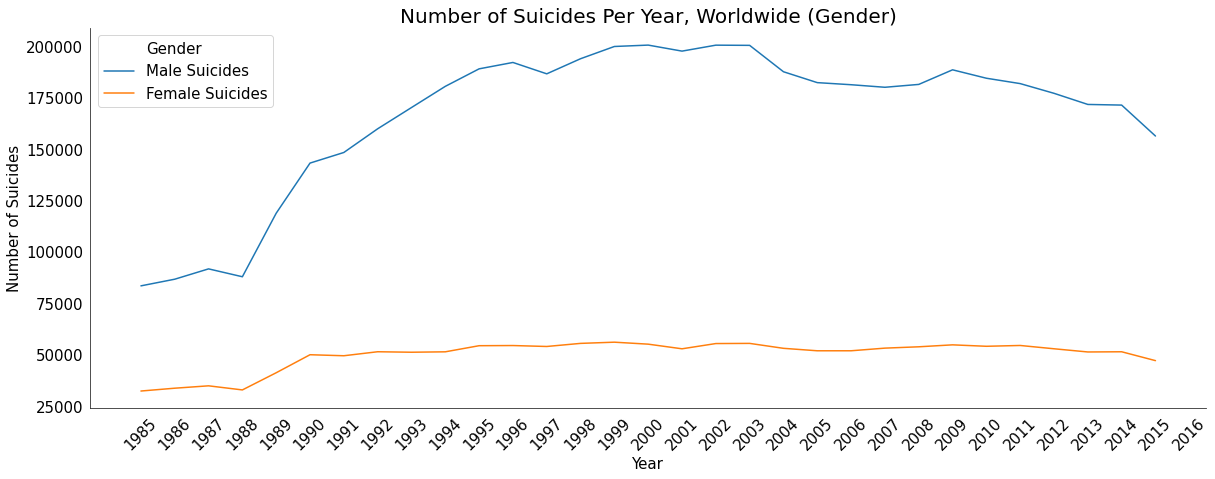

In [32]:
# plotting a line graph comparing number of suicides per year across two genders

fig, ax = plt.subplots(figsize=(20,7))
sns.despine()
sns.set_style("white")

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=15

sns_suisex = sns.lineplot(x='Year', y='Suicides', hue='Gender', data=sexyr_suicide.reset_index(), markers=True, ax=ax)
ax.set_title("Number of Suicides Per Year, Worldwide (Gender)", fontsize=20)
ax.set_ylabel("Number of Suicides")
ax.set_xlabel("Year")
ax.set_xticks(year)
ax.set_xticklabels(year, rotation=45)
sns_suisex.figure.savefig("Number of Suicides Per Year, Worldwide (Gender).png")
plt.show()

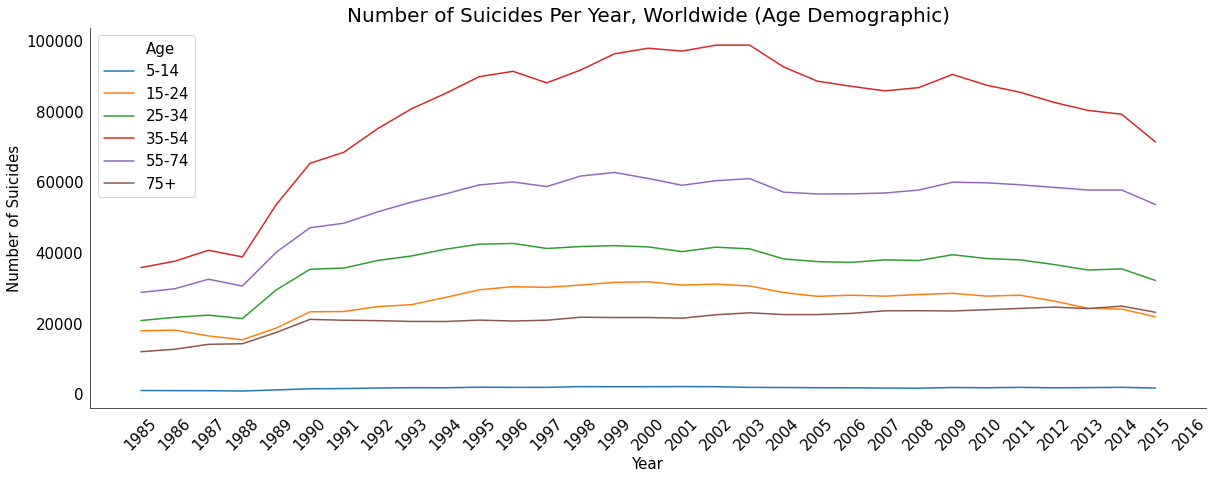

In [33]:
# plotting a line graph comparing number of suicides per year across all age demographics

fig, ax = plt.subplots(figsize=(20,7))
sns.despine()
sns.set_style("white")

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=15

sns_suiage = sns.lineplot(x='Year', y='Suicides', hue='Age', data=ageyr_suicide.reset_index(), markers=True, ax=ax)
ax.set_title("Number of Suicides Per Year, Worldwide (Age Demographic)", fontsize=20)
ax.set_ylabel("Number of Suicides")
ax.set_xlabel("Year")
ax.set_xticks(year)
ax.set_xticklabels(year, rotation=45)
sns_suiage.figure.savefig("Number of Suicides Per Year, Worldwide (Age Demographic).png")
plt.show()

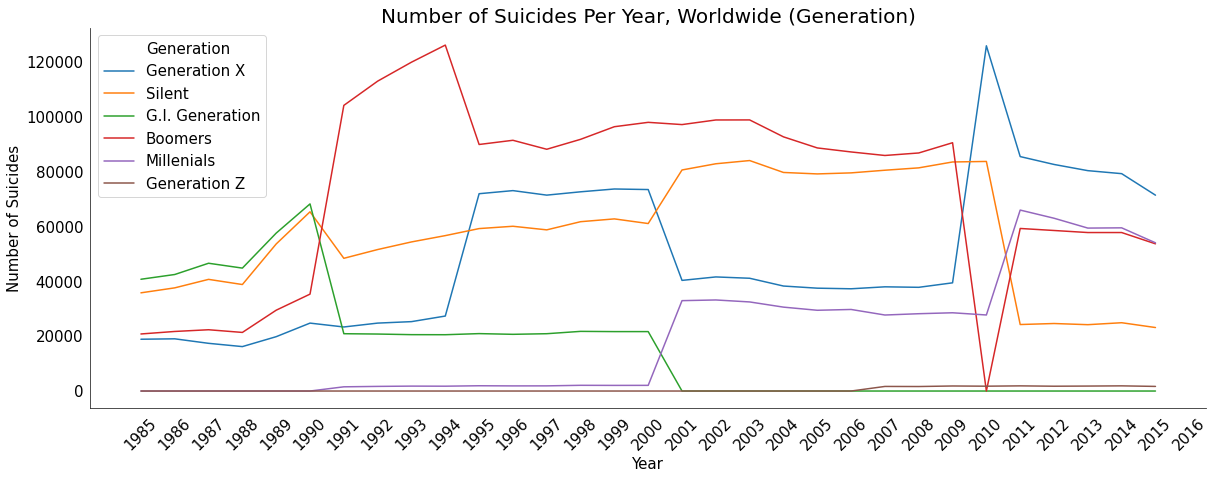

In [34]:
# plotting a line graph comparing number of suicides per year across all generations

fig, ax = plt.subplots(figsize=(20,7))
sns.despine()
sns.set_style("white")

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=15

sns_suigen = sns.lineplot(x='Year', y='Suicides', hue='Generation', data=genyr_suicide.reset_index(), markers=True, ax=ax)
ax.set_title("Number of Suicides Per Year, Worldwide (Generation)", fontsize=20)
ax.set_ylabel("Number of Suicides")
ax.set_xlabel("Year")
ax.set_xticks(year)
ax.set_xticklabels(year, rotation=45)
sns_suigen.figure.savefig("Number of Suicides Per Year, Worldwide (Generation).png")
plt.show()

#### Analysis of Gender, Age Demographic and Generation by Country

In [35]:
# segregating data based on country

ctrMsuicide = []
ctrFsuicide = []
ctr_genx = []
ctr_sil = []
ctr_gigen = []
ctr_boom = []
ctr_mil = []
ctr_genz = []
ctr_5to14 = []
ctr_15to24 = []
ctr_25to34 = []
ctr_35to54 = []
ctr_55to74 = []
ctr_75plus = []
for i in country:
    ctrMsuicide.append(sum(data[(data.Country == i) & (data.Gender == 'male')]['SuicideNumber']))
    ctrFsuicide.append(sum(data[(data.Country == i) & (data.Gender == 'female')]['SuicideNumber']))
    ctr_genx.append(sum(data[(data.Country == i) & (data.Generation == 'Generation X')]['SuicideNumber']))
    ctr_sil.append(sum(data[(data.Country == i) & (data.Generation == 'Silent')]['SuicideNumber']))
    ctr_gigen.append(sum(data[(data.Country == i) & (data.Generation == 'G.I. Generation')]['SuicideNumber']))
    ctr_boom.append(sum(data[(data.Country == i) & (data.Generation == 'Boomers')]['SuicideNumber']))
    ctr_mil.append(sum(data[(data.Country == i) & (data.Generation == 'Millenials')]['SuicideNumber']))
    ctr_genz.append(sum(data[(data.Country == i) & (data.Generation == 'Generation Z')]['SuicideNumber']))
    ctr_5to14.append(sum(data[(data.Country == i) & (data.Age == '5-14 years')]['SuicideNumber']))
    ctr_15to24.append(sum(data[(data.Country == i) & (data.Age == '15-24 years')]['SuicideNumber']))
    ctr_25to34.append(sum(data[(data.Country == i) & (data.Age == '25-34 years')]['SuicideNumber']))
    ctr_35to54.append(sum(data[(data.Country == i) & (data.Age == '35-54 years')]['SuicideNumber']))
    ctr_55to74.append(sum(data[(data.Country == i) & (data.Age == '55-74 years')]['SuicideNumber']))
    ctr_75plus.append(sum(data[(data.Country == i) & (data.Age == '75+ years')]['SuicideNumber']))

print(ctrMsuicide)
print(ctrFsuicide)
print(ctr_genx)
print(ctr_sil)
print(ctr_gigen)
print(ctr_boom)
print(ctr_mil)
print(ctr_genz)
print(ctr_5to14)
print(ctr_15to24)
print(ctr_25to34)
print(ctr_35to54)
print(ctr_55to74)
print(ctr_75plus)

[1277, 10, 63893, 1410, 84, 54785, 36878, 1244, 79, 383, 144, 49890, 44749, 297, 248, 177598, 26420, 37, 83377, 34061, 41737, 5813, 13754, 29743, 330, 34440, 10968, 0, 14422, 8338, 5641, 213, 26017, 239708, 2530, 211555, 9828, 34, 6176, 2608, 55776, 853, 10123, 8613, 99179, 158, 555272, 83386, 43, 665, 10453, 10296, 23028, 1416, 15, 14, 475, 2899, 91805, 371, 328, 33947, 11028, 1531, 12307, 33, 2971, 3326, 16057, 118035, 18187, 7989, 524, 179115, 59595, 995412, 0, 196, 113, 4, 17416, 89, 6296, 11413, 8313, 5719, 75533, 42043, 1598, 26612, 18478, 82542, 3219, 7562, 6528, 258573, 524, 104118, 820216, 10318, 25543]
[693, 1, 18326, 495, 17, 15326, 13195, 412, 14, 80, 33, 10002, 18012, 51, 70, 49015, 9968, 5, 24184, 6834, 11343, 979, 4675, 11675, 82, 9247, 4329, 0, 6238, 3345, 1393, 91, 7660, 89419, 694, 79707, 2540, 4, 1973, 818, 18115, 255, 2451, 2681, 32881, 26, 251630, 18160, 10, 301, 2637, 2474, 5011, 542, 12, 6, 110, 995, 19334, 52, 144, 16886, 3355, 482, 4685, 0, 512, 1457, 5273, 210

In [36]:
# creating dataset to be used for analysis

gencon_suicide_data = {'Country':country, 'Generation X':ctr_genx, 'Silent':ctr_sil, 'G.I. Generation':ctr_gigen, 'Boomers':ctr_boom, 'Millenials':ctr_mil, 'Generation Z':ctr_genz}
gencon_suicide = pd.DataFrame(data=gencon_suicide_data)
sexcon_suicide_data = {'Country':country, 'Male Suicides':ctrMsuicide, 'Female Suicides':ctrFsuicide}
sexcon_suicide = pd.DataFrame(data=sexcon_suicide_data)
agecon_suicide_data = {'Country':country, '5-14':ctr_5to14, '15-24':ctr_15to24, '25-34':ctr_25to34, '35-54':ctr_35to54, '55-74':ctr_55to74, '75+':ctr_75plus}
agecon_suicide = pd.DataFrame(data=agecon_suicide_data)
gencon_suicide = pd.melt(gencon_suicide, id_vars="Country", var_name="Generation", value_name="Suicides")
sexcon_suicide = pd.melt(sexcon_suicide, id_vars="Country", var_name="Gender", value_name="Suicides")
agecon_suicide = pd.melt(agecon_suicide, id_vars="Country", var_name="Age", value_name="Suicides")
gencon_suicide = gencon_suicide.sort_values('Suicides', ascending = True)
sexcon_suicide = sexcon_suicide.sort_values('Suicides', ascending = True)
agecon_suicide = agecon_suicide.sort_values('Suicides', ascending = True)

In [37]:
# plotting a bar graph depicting number of suicides per country across genders

fig = px.bar(sexcon_suicide, x="Suicides", y="Country", color="Gender", barmode="relative")

fig.update_layout(legend_title_text = "Gender", width=1000, height=2000, plot_bgcolor='#fff', title="Number of Suicides Per Country (Gender)")
fig.update_xaxes(title_text="Countries")
fig.update_yaxes(title_text="Number of Suicides")
fig.show()

In [38]:
# plotting a bar graph depicting number of suicides per country across age demographic

fig = px.bar(agecon_suicide, x="Suicides", y="Country", color="Age", barmode="relative")

fig.update_layout(legend_title_text = "Age Demographic", width=1000, height=2500, plot_bgcolor='#fff', title="Number of Suicides Per Country (Age Demographic)")
fig.update_xaxes(title_text="Countries")
fig.update_yaxes(title_text="Number of Suicides")
fig.show()

In [39]:
# plotting a bar graph depicting number of suicides per country across generation

fig = px.bar(gencon_suicide, x="Suicides", y="Country", color="Generation", barmode="relative")

fig.update_layout(legend_title_text = "Generation", width=1000, height=2500, plot_bgcolor='#fff', title="Number of Suicides Per Country (Generation)")
fig.update_xaxes(title_text="Countries")
fig.update_yaxes(title_text="Number of Suicides")
fig.show()